In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pandas.read_csv('./data/gemeentedata_merged.csv', sep=';')

In [3]:
parties = list(data.columns[-37:])

In [4]:
parties

['VVD',
 'D66',
 'PVV',
 'CDA',
 'SP',
 'PvdA',
 'GROENLINKS',
 'FvD',
 'PvdD',
 'ChristenUnie',
 'Volt',
 'JA21',
 'SGP',
 'DENK',
 '50PLUS',
 'BBB',
 'BIJ1',
 'CODE ORANJE',
 'NIDA',
 'Splinter',
 'Piratenpartij',
 'JONG',
 'TROTS',
 'Lijst Henk Krol',
 'NLBeter',
 'Blanco',
 'LP',
 'OPRECHT',
 'JEZUS LEEFT',
 'DFP',
 'U-Buntu Connected Front',
 'Vrij en Sociaal Nederland',
 'PvdE',
 'Wij zijn Nederland',
 'PvdR',
 'Modern Nederland',
 'De Groenen']

In [5]:
data['Percentage Opkomst'] = round(100 * data['Opkomst'] / data['Kiesgerechtigden'], 1)

In [6]:
data['Percentage geldigestemmen 50PLUS'] = round(100 * data['50PLUS'] / data['GeldigeStemmen'], 1)

data['Percentage geldigestemmen VVD'] = round(100 * data['VVD'] / data['GeldigeStemmen'], 1)

data['Percentage geldigestemmen SP'] = round(100 * data['SP'] / data['GeldigeStemmen'], 1)

In [7]:
data['Percentage geldigestemmen chr partijen'] = round(100 * (data['CDA'] +\
                                                              data['ChristenUnie'] +\
                                                              data['SGP'] +\
                                                              data['JEZUS LEEFT']) / data['GeldigeStemmen'], 1)

In [8]:
data['Diefstal/inbraak pp'] = round(data['Diefstal/inbraak'] / data['Bevolking totaal'], 6)

In [9]:
data['Percentage Autochtonen'] = round(100 * data['Autochtonen totaal'] / data['Bevolking totaal'], 1)
data['Percentage Allochtonen'] = round(100 * data['Allochtonen totaal'] / data['Bevolking totaal'], 1)
data['Percentage Allochtonen Niet Westers'] = round(100 * data['Allochtonen Niet Westers'] / data['Bevolking totaal'], 1)

# Verdeling stemmen

Van de landelijke Nederlandse verkiezingen in het jaar 2021

In [10]:
election_results = pandas.Series([data[party].sum() for party in parties])

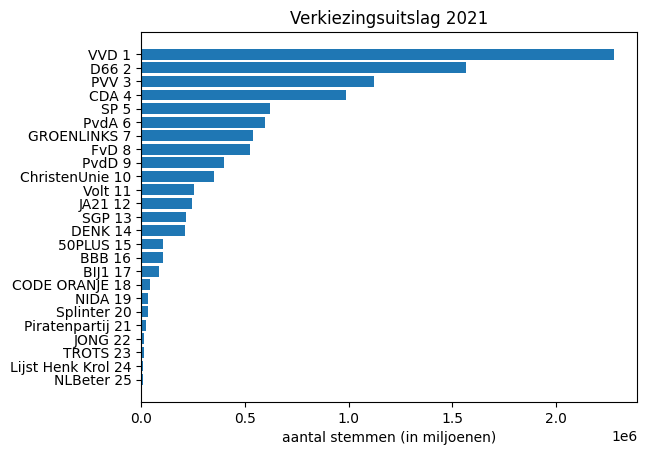

In [11]:
plt.rcdefaults()
fig, ax = plt.subplots()
xaxis = np.arange(1, len(election_results[0:25])+1)

ax.barh(xaxis, list(reversed(election_results[0:25])), align='center')
ax.set_yticks(xaxis)
ax.set_yticklabels('{} {}'.format(parties[number], xaxis[number]) for number in list(reversed(range(len(parties[0:25])))))

plt.title('Verkiezingsuitslag 2021')
plt.xlabel('aantal stemmen (in miljoenen)')
plt.show()

In [12]:
election_results_scaled = 100 * election_results / election_results.sum()

In [13]:
election_results_scaled_cumulative = election_results_scaled.cumsum()

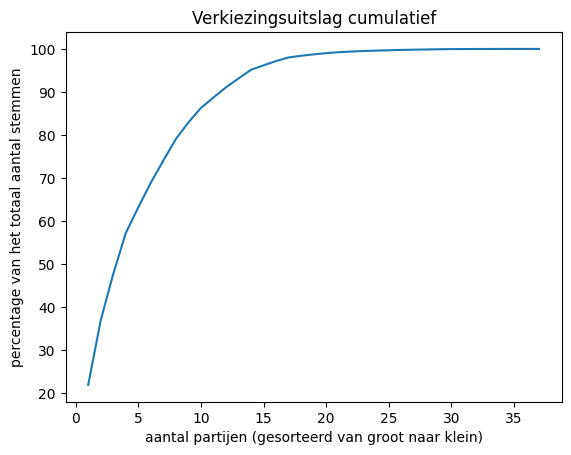

In [14]:
xaxis = np.arange(1, len(election_results_scaled_cumulative)+1)
plt.plot(xaxis, election_results_scaled_cumulative)
plt.title('Verkiezingsuitslag cumulatief')
plt.xlabel('aantal partijen (gesorteerd van groot naar klein)')
plt.ylabel('percentage van het totaal aantal stemmen'); print()

In [15]:
(election_results_scaled_cumulative<= 80).isin([True]).sum()

8

- Meer dan 80% van de stemmen ging naar slechts 8 partijen.

### Opkomstpercentage per gemeente

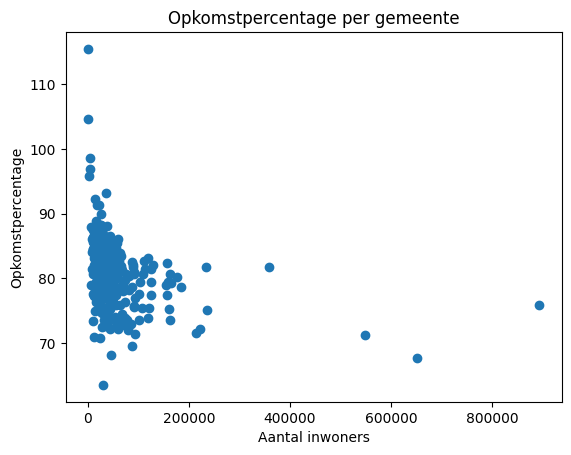

In [16]:
plt.scatter(data['Bevolking totaal'], data['Percentage Opkomst'])
plt.xlabel('Aantal inwoners')
plt.ylabel('Opkomstpercentage')
plt.title('Opkomstpercentage per gemeente'); print()

In [17]:
round(data['Percentage Opkomst'].corr(data['Bevolking totaal']), 2)

-0.3

In [18]:
round(data['Percentage Opkomst'].mean(), 2)

81.01

- De negatieve correlatie toont aan dat in de grotere gemeenten het opkomstpercentage over het algemeen lager is dan in de kleinere gemeenten.
- Verder zien we dat het gemiddelde opkomstpercentage per gemeente hoger dan 80% is. Dit moet niet verward worden met het landelijk opkomst percentage.

In [19]:
data2show = data[['Gemeente', 'Bevolking totaal', 'Percentage Opkomst']]

In [20]:
data2show.sort_values(by=['Percentage Opkomst'], ascending=[True]).head(n=10)

,Gemeente,Bevolking totaal,Percentage Opkomst
114,Halderberge,30430,63.5
245,Rotterdam,651631,67.7
152,Kerkrade,45442,68.1
124,Heerlen,86936,69.5
247,Rucphen,23080,70.7
228,Pekela,12176,70.9
67,Den Haag,548320,71.2
129,Helmond,92627,71.4
9,Almere,214715,71.5
250,Schiedam,79279,72.0


In [21]:
data2show.sort_values(by=['Percentage Opkomst'], ascending=[False]).head(n=10)

,Gemeente,Bevolking totaal,Percentage Opkomst
251,Schiermonnikoog,931,115.5
298,Vlieland,1194,104.7
13,Ameland,3746,98.6
271,Terschelling,4870,96.9
246,Rozendaal,1726,95.9
56,Castricum,36086,93.2
272,Texel,13656,92.2
263,Staphorst,17261,91.4
283,Urk,21227,91.3
301,Voorschoten,25650,89.9


Om e.e.a. concreet te maken:
- We zien dat in een grote stad als Rotterdam het opkomstpercentage erg laag is.
- Omgekeerd zien we dat in kleine gemeenten als de Waddeneilanden het opkomstpercentage erg hoog is.
- We zien verder dat de data van Schiermonnikoog en Vlieland niet helemaal correct is!

# Populatie en geografie

We onderzoeken hier hoe de Nederlandse populatie verdeeld is over de verschillende gemeenten.

In [22]:
population_total = data[['Bevolking totaal']].sort_values(by=['Bevolking totaal'], ascending=[False])

In [23]:
nr_municipalities = len(population_total)
print(f'Aantal gemeenten in Nederland: {nr_municipalities}')

Aantal gemeenten in Nederland: 344


In [24]:
population_total_cumsum = population_total.cumsum()

In [25]:
population_size_NL = population_total_cumsum.tail(n=1).iat[0, 0]
print(f'Totale bevolking Nederland: {population_size_NL:,}')

Totale bevolking Nederland: 17,475,415


In [26]:
population_total_cumsum_relative = 100 * population_total_cumsum / population_size_NL

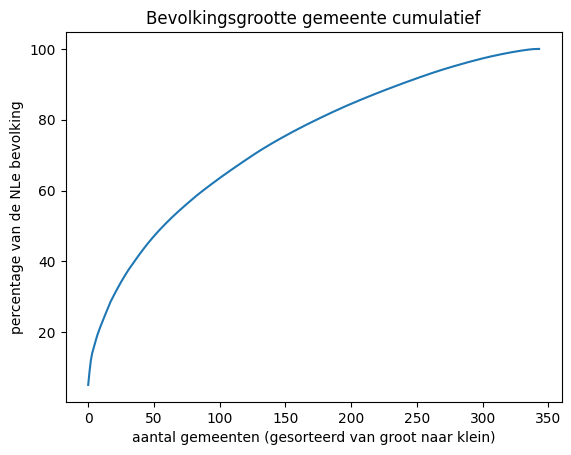

In [27]:
xaxis = np.arange(len(population_total_cumsum))
plt.plot(xaxis, population_total_cumsum_relative)
plt.xlabel('aantal gemeenten (gesorteerd van groot naar klein)')
plt.ylabel('percentage van de NLe bevolking')
plt.title('Bevolkingsgrootte gemeente cumulatief')
print()

In [28]:
sum_ = (population_total_cumsum_relative <= 50)['Bevolking totaal'].isin([True]).sum()
print(f'Aantal gemeenten: {sum_}')

Aantal gemeenten: 58


In [29]:
sum_ = (population_total_cumsum_relative <= 80)['Bevolking totaal'].isin([True]).sum()
print(f'Aantal gemeenten: {sum_}')

Aantal gemeenten: 174


- De helft van de bevolking woont in de 58 grootste gemeenten
- 80% van de bevolking woont in ongeveer de helft van de (grootste) gemeenten in Nederland (174 gemeenten)

In [30]:
bins = [0, 5000, 20000, 50000, 150000, 10000000]
groups = ['heel kleine gemeenten', 
          'kleine gemeenten', 
          'middelgrote gemeenten', 
          'grote gemeenten', 
          'heel grote gemeenten'
         ]
population_total['type_gemeente'] = pandas.cut(population_total['Bevolking totaal'], bins, labels=groups)
total = 0
total_rel_nr = 0
for group in population_total.groupby('type_gemeente'):
    group_size = len(group[1])
    rel_nr_municipalities = round(100 * group_size / nr_municipalities, 1)
    total += group_size
    total_rel_nr += rel_nr_municipalities
    print(f"{group[0]:<25} {group_size:<10} {rel_nr_municipalities:>5} %")
print()
print(25 * " ", f"{total:<10} {int(total_rel_nr):>5} %")

heel kleine gemeenten     5            1.5 %
kleine gemeenten          67          19.5 %
middelgrote gemeenten     182         52.9 %
grote gemeenten           72          20.9 %
heel grote gemeenten      18           5.2 %

                          344          100 %


- We kunnen een onderverdeling maken in (heel) grote en (heel) klein gemeenten.<br>
    * Een kleine gemeente is tussen de 5000 en 20000 inwoners groot.<br>
    * Een middelgrote gemeente tussen de 20000 en 50000 inwoners.<br>
    * Een grote gemeente tussen de 50000 inwoners en 150000 inwoners groot.<br>

### Bevolkingsdichtheid

In [31]:
data[['Gemeente', 'Bevolkingsdichtheid']].sort_values(by=['Bevolkingsdichtheid'], ascending=[False]).head(n=10)

,Gemeente,Bevolkingsdichtheid
67,Den Haag,6650
163,Leiden,5664
112,Haarlem,5572
16,Amsterdam,5177
55,Capelle aan den IJssel,4761
66,Delft,4573
108,Gouda,4466
250,Schiedam,4449
178,Maassluis,3958
241,Rijswijk,3956


- De top 10 gemeenten met de grootste bevolkingsdichtheid zijn allemaal terug te vinden in de Randstad

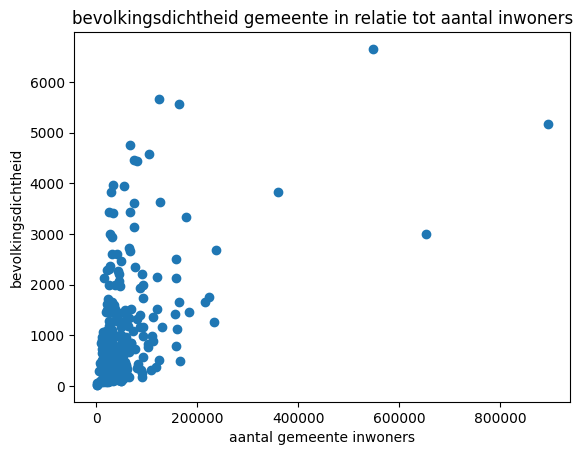

In [32]:
data2plot = data.sort_values(by=['Bevolking totaal'], ascending=[True])[['Bevolking totaal', 'Bevolkingsdichtheid']]
plt.scatter(data2plot['Bevolking totaal'], data2plot['Bevolkingsdichtheid'])
plt.xlabel('aantal gemeente inwoners')
plt.ylabel('bevolkingsdichtheid')
plt.title('bevolkingsdichtheid gemeente in relatie tot aantal inwoners')
print()

In [33]:
round(data['Bevolking totaal'].corr(data['Bevolkingsdichtheid']), 2)

0.52

- Er is een sterke correlatie tussen bevolkingsdichtheid van een gemeente en het totaal aantal inwoners van een gemeente.<br>In het algemeen geldt dus: hoe groter een gemeente (qua inwoners) hoe groter de bevolkingsdichtheid.

#### We onderzoeken nu outlyers

In [34]:
data[(data['Bevolkingsdichtheid'] > 3000) & (data['Bevolking totaal'] < 50000)][['Gemeente', 
                                                                                 'Bevolkingsdichtheid', 
                                                                                 'Bevolking totaal']]

,Gemeente,Bevolkingsdichtheid,Bevolking totaal
121,Heemstede,3001,27545
154,Krimpen aan den IJssel,3824,29410
178,Maassluis,3958,33567
207,Oegstgeest,3429,25064
226,Papendrecht,3419,32171


- Gemeenten met de bevolkingsdichtheid van een grote gemeente, maar het bevolkingsaantal van een middelgrote gemeente

    * Krimpen aan den IJssel<br>&nbsp;&nbsp;&nbsp;&nbsp; stad gelegen naast een grote stad, grenst ook aan polder, maar deze polder hoort bij andere gemeenten.

    * Maassluis<br>&nbsp;&nbsp;&nbsp;&nbsp; kleine stad met weinig polder, ook al is het omgeven door polder. Deze polder hoort bij andere gemeenten.

In [35]:
data[(data['Bevolkingsdichtheid'] < 1000) & (data['Bevolking totaal'] > 100000)][['Gemeente', 
                                                                                  'Bevolkingsdichtheid', 
                                                                                  'Bevolking totaal']]

,Gemeente,Bevolkingsdichtheid,Bevolking totaal
7,Alkmaar,995,109896
10,Alphen aan den Rijn,892,112587
17,Apeldoorn,485,164781
70,Deventer,775,101236
85,Ede,373,118530
92,Emmen,319,107024
113,Haarlemmermeer,799,157789
162,Leeuwarden,523,124481
294,Venlo,821,101988


- Gemeenten met de bevolkingsdichtheid van een kleine gemeente, maar het bevolkingsaantal van een (heel) grote gemeente
    * Alkmaar<br>&nbsp;&nbsp;&nbsp;&nbsp; grote stad met veel laagbouw
    * Alphen aan den Rijn<br>&nbsp;&nbsp;&nbsp;&nbsp; een gemeente die naast stad, ook relatief veel polder heeft.
    * Apeldoorn<br>&nbsp;&nbsp;&nbsp;&nbsp; Stad met veel laagbouw, en relatief veel parken

### Stemgedrag in relatie tot grootte van een gemeente

In [36]:
round(data['Bevolking totaal'].corr(data['Percentage geldigestemmen chr partijen']), 2)

-0.21

- We zien een negatieve correlatie tussen de grootte van de populatie van een gemeente en het percentage stemmen dat naar christelijke partijen ging. Over het algemeen wordt op het platteland meer op christelijke partijen gestemd dan in de grote stad.

# Bevolkingssamenstelling naar leeftijd

In [37]:
max_age = data['Gemiddelde leeftijd bevolking'].max()
print(f"Hoogst gemeten gemiddelde leeftijd: {max_age}")

Hoogst gemeten gemiddelde leeftijd: 50.2


In [38]:
min_age = data['Gemiddelde leeftijd bevolking'].min()
print(f"Laagst gemeten gemiddelde leeftijd: {min_age}")

Laagst gemeten gemiddelde leeftijd: 32.4


- We zien een aanzienlijke spreiding in de gemiddelde leeftijd van de bevolking van gemeenten

### Top 10 jongste gemeenten

In [39]:
data.sort_values(by='Gemiddelde leeftijd bevolking').head(n=10)[['Gemeente', 'Gemiddelde leeftijd bevolking', 'Werkloosheidspercentage', 'Percentage geldigestemmen chr partijen', 'Percentage Opkomst']]

,Gemeente,Gemiddelde leeftijd bevolking,Werkloosheidspercentage,Percentage geldigestemmen chr partijen,Percentage Opkomst
283,Urk,32.4,2.7,71.7,91.3
284,Utrecht,36.1,4.5,6.7,81.7
263,Staphorst,37.7,2.9,58.9,91.4
235,Renswoude,37.8,2.7,43.9,87.9
9,Almere,38.4,5.7,7.4,71.5
24,Barneveld,38.5,3.2,48.3,86.1
109,Groningen,38.5,6.0,10.0,81.7
16,Amsterdam,38.8,6.5,4.2,75.9
193,Neder-Betuwe,39.0,3.0,46.0,83.1
71,Diemen,39.1,5.0,6.6,73.5


- We zien een groot aantal christelijke gemeenten, en daarnaast 3 bekende studentensteden in de top 10

### Gemiddelde leeftijd van de Nederlandse bevolking

In [40]:
data['Totaal leeftijd'] = data['Gemiddelde leeftijd bevolking'] * data['Bevolking totaal']

In [41]:
average_age_NL = round(data['Totaal leeftijd'].sum() / data['Bevolking totaal'].sum(), 1)
print(f"Gemiddelde leeftijd Nederland: {average_age_NL} jaar")

Gemiddelde leeftijd Nederland: 42.3 jaar


### Correlatie tussen gemiddelde leeftijd bevolking en gemiddelde vraagprijs aangeboden woningen

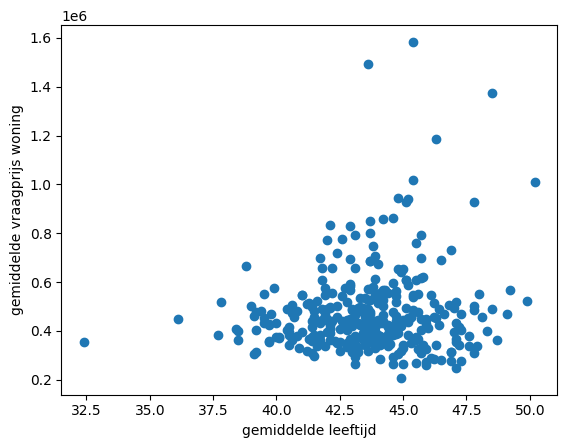

In [42]:
plt.scatter(data['Gemiddelde leeftijd bevolking'], data['Gemiddelde vraagprijs aangeboden woningen'])
plt.xlabel('gemiddelde leeftijd')
plt.ylabel('gemiddelde vraagprijs woning')
plt.title(''); print()

In [43]:
round(data['Gemiddelde leeftijd bevolking'].corr(data['Gemiddelde vraagprijs aangeboden woningen']), 2)

0.12

- Er blijkt een lichte correlatie te zijn

### Correlatie tussen gemiddelde leeftijd bevolking (van een gemeente) en percentage opkomst verkiezingen

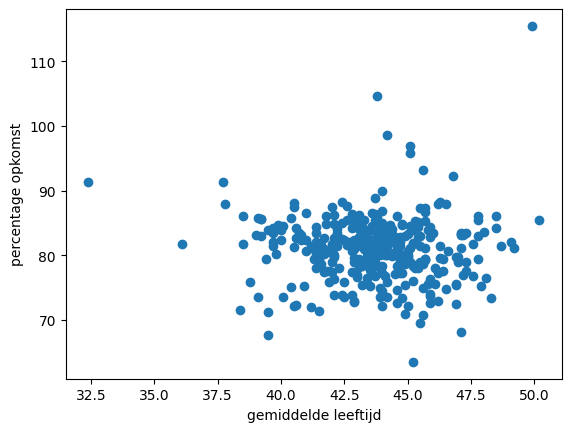

In [44]:
plt.scatter(data['Gemiddelde leeftijd bevolking'], data['Percentage Opkomst'])
plt.xlabel('gemiddelde leeftijd')
plt.ylabel('percentage opkomst')
plt.title('')
print()

In [45]:
round(data['Gemiddelde leeftijd bevolking'].corr(data['Percentage Opkomst']), 2)

-0.01

- Er blijkt nauwelijks een correlatie te zijn

### Correlatie aantal stemmen 50plus en gemiddelde leeftijd bevolking (van een gemeente)

In [46]:
round(data['Gemiddelde leeftijd bevolking'].corr(data['Percentage geldigestemmen 50PLUS']), 2)

0.38

- Zoals te verwachten is er een significante correlatie

# Rijk versus arm

### Analyses m.b.t. werkloosheid

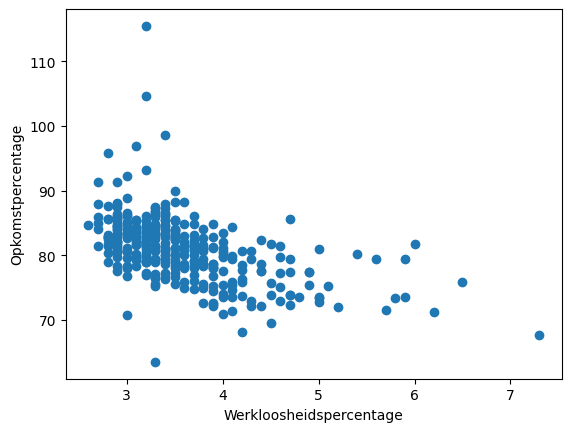

In [47]:
plt.scatter(data['Werkloosheidspercentage'], data['Percentage Opkomst'])
plt.ylabel('Opkomstpercentage')
plt.xlabel('Werkloosheidspercentage')
plt.title('')
print()

In [48]:
round(data['Werkloosheidspercentage'].corr(data['Percentage Opkomst']), 2)

-0.5

- Gemeenten met veel werkloosheid hebben vaak een laag opkomstpercentage voor de verkiezingen

### Analyses m.b.t. inkomen en woningprijs

In [49]:
round(data['Gemiddelde vraagprijs aangeboden woningen'].corr(data['Besteedbaar inkomen per huishouden|2019']), 2)

0.78

- We zien een heel sterke correlatie tussen:<br>
    * Gemiddelde vraagprijs aangeboden woningen<br>
    * Besteedbaar inkomen per huishouden|2019<br>
<br>
- We kunnen deze grootheden gebruiken om rijke gemeenten van arme gemeenten te onderscheiden.


### Introductie wealth score

In [50]:
gva_mean = data['Gemiddelde vraagprijs aangeboden woningen'].mean()

In [51]:
bi_mean = data['Besteedbaar inkomen per huishouden|2019'].mean()

In [52]:
data['wealth_score'] = data['Gemiddelde vraagprijs aangeboden woningen'] / gva_mean +\
                       data['Besteedbaar inkomen per huishouden|2019'] / bi_mean

### Top 10 rijkste gemeenten op basis van de wealth score

In [53]:
data.sort_values(by='wealth_score', ascending=[False]).head(n=10)[['Gemeente', 
                                                                   'wealth_score', 
                                                                   'Gemiddelde vraagprijs aangeboden woningen', 
                                                                   'Besteedbaar inkomen per huishouden|2019', 
                                                                   'Werkloosheidspercentage', 
                                                                   'Percentage Allochtonen Niet Westers', 
                                                                   'Diefstal/inbraak pp']]

,Gemeente,wealth_score,Gemiddelde vraagprijs aangeboden woningen,Besteedbaar inkomen per huishouden|2019,Werkloosheidspercentage,Percentage Allochtonen Niet Westers,Diefstal/inbraak pp
39,Blaricum,5.313321,1492794,102.3,3.4,9.4,0.001673
309,Wassenaar,4.969672,1583386,77.0,4.1,14.0,0.002301
161,Laren,4.467723,1375610,74.0,3.7,6.8,0.003158
40,Bloemendaal,4.210397,1187580,80.6,3.6,5.4,0.002215
323,Wijdemeren,3.343692,1018327,56.5,3.4,5.6,0.001308
31,Bergen (NH.),3.315524,1009989,56.0,3.1,3.9,0.000808
305,Waalre,3.243623,943870,59.2,3.3,6.9,0.001539
320,Westvoorne,3.210850,928342,59.2,3.0,4.3,0.001544
22,Baarn,3.133434,938739,54.5,3.4,8.7,0.002864
121,Heemstede,3.033133,794057,64.2,3.4,7.4,0.001706


- In de top 10 staan gemeenten die bekend staan als rijk

### Analyses wealth score

#### In relatie tot werkloosheid

In [54]:
round(data['wealth_score'].corr(data['Werkloosheidspercentage']), 2)

-0.24

- We zien een negatieve correlatie tussen de wealth score en het werkloosheidspercentage.

#### In relatie tot niet-Westerse allochtonen

In [55]:
round(data['wealth_score'].corr(data['Percentage Allochtonen Niet Westers']), 2)

-0.06

In [56]:
average = round(data['Percentage Allochtonen Niet Westers'].sum() / len(data['Percentage Allochtonen Niet Westers']), 1)
print(f"Gemiddeld percentage niet-Westerse allochtonen per gemeente: {average} %")

Gemiddeld percentage niet-Westerse allochtonen per gemeente: 8.0 %


- We zien nauwelijks een correlatie tussen de gedefinieerde wealth score en het percentage niet-Westerse allochtonen in een gemeente.<br>
&nbsp;&nbsp;&nbsp;&nbsp;Dat valt in de bovengenoemde top 10 inderdaad na te gaan.

#### In relatie tot stemgedrag

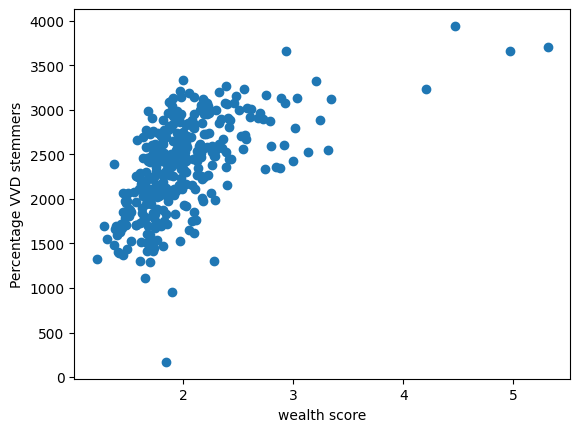

In [57]:
plt.scatter(data['wealth_score'], 100 * data['Percentage geldigestemmen VVD'])
plt.xlabel('wealth score')
plt.ylabel('Percentage VVD stemmers')
plt.title('')
print()

In [58]:
round(data['wealth_score'].corr(data['Percentage geldigestemmen VVD']), 2)

0.59

In [59]:
round(data['wealth_score'].corr(data['Percentage geldigestemmen SP']), 2)

-0.46

- We zien duidelijke correlaties tussen de wealth score en de voorkeur voor partijen als VVD en SP:
    - In rijke gemeenten wordt veel VVD gestemd
    - In gemeenten met meer armoede en lagere inkomens wordt veel SP gestemd

#### In relatie tot criminaliteit

In [60]:
round(data['wealth_score'].corr(data['Diefstal/inbraak pp']), 2)

0.3

In [61]:
round(data['wealth_score'].corr(data['Misdrijven totaal'] / data['Bevolking totaal']), 2)

-0.12

- Voor diefstal zien we een positieve correlatie met de welvaart in een gemeente.
- We zien een lichte negatieve correlatie tussen het aantal misdrijven per hoofd van de gemeentelijke bevolking en de welvaart in een gemeente.